In [1]:
import numpy as np
import pandas as pd

In [2]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

Clusters: 2, DB Index: 0.7317917074274123
Clusters: 3, DB Index: 0.7962864060880129
Clusters: 4, DB Index: 0.8956923630972515
Clusters: 5, DB Index: 0.938455524595955
Clusters: 6, DB Index: 0.9643187474178582
Clusters: 7, DB Index: 0.9517873634243489
Clusters: 8, DB Index: 0.9686936999853657
Clusters: 9, DB Index: 0.9813682800733103
Clusters: 10, DB Index: 0.9695687267648964
Optimal Number of Clusters: 2


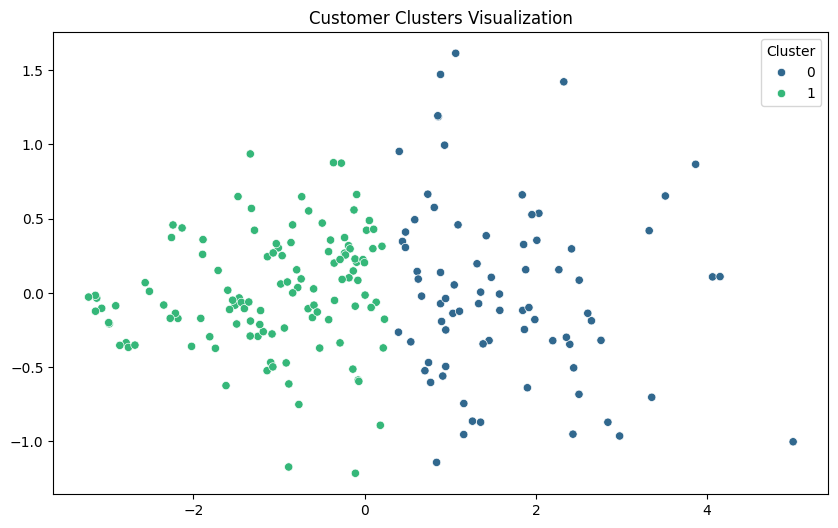

In [6]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Feature engineering for clustering
clustering_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

# Normalize features
features = scaler.fit_transform(clustering_data.drop('CustomerID', axis=1))

# Perform clustering
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    db_index = davies_bouldin_score(features, cluster_labels)
    db_scores.append((k, db_index))
    print(f"Clusters: {k}, DB Index: {db_index}")

# Choose the best number of clusters
best_k = min(db_scores, key=lambda x: x[1])[0]
print(f"Optimal Number of Clusters: {best_k}")

# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(features)

# PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# The following lines were changed to import matplotlib.pyplot and seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clustering_data['Cluster'], palette='viridis')
plt.title('Customer Clusters Visualization')
plt.show()

# Save clustering results
clustering_data.to_csv('FirstName_LastName_Clustering.csv', index=False)

In [7]:
a=pd.read_csv('/content/FirstName_LastName_Clustering.csv')
a

,CustomerID,TotalValue,Quantity,ProductID,Cluster
0,C0001,3354.52,12,5,1
1,C0002,1862.74,10,4,1
2,C0003,2725.38,14,4,1
3,C0004,5354.88,23,8,0
4,C0005,2034.24,7,3,1
...,...,...,...,...,...
194,C0196,4982.88,12,3,1
195,C0197,1928.65,9,3,1
196,C0198,931.83,3,2,1
197,C0199,1979.28,9,4,1


In [15]:
from sklearn.metrics import davies_bouldin_score

X = a['Quantity']
labels = a['Cluster']

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X.values.reshape(-1, 1), labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6097857946945362
